# Using Random Forest to classify the Diabetes dataset

In [1]:
# Using Random Forest to classify the Diabetes dataset
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Load data
dataset = pd.read_csv('../dataset/diabetes_norm.csv')

In [3]:
# Split dataset into training and test set
X = dataset.iloc[:, 0:len(dataset.columns)-1].values
y = dataset.iloc[:, len(dataset.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Create the classifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [5]:
# Predict the test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[76 10]
 [23 29]]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        86
           1       0.74      0.56      0.64        52

    accuracy                           0.76       138
   macro avg       0.76      0.72      0.73       138
weighted avg       0.76      0.76      0.75       138



Accuracy Score:
0.7608695652173914


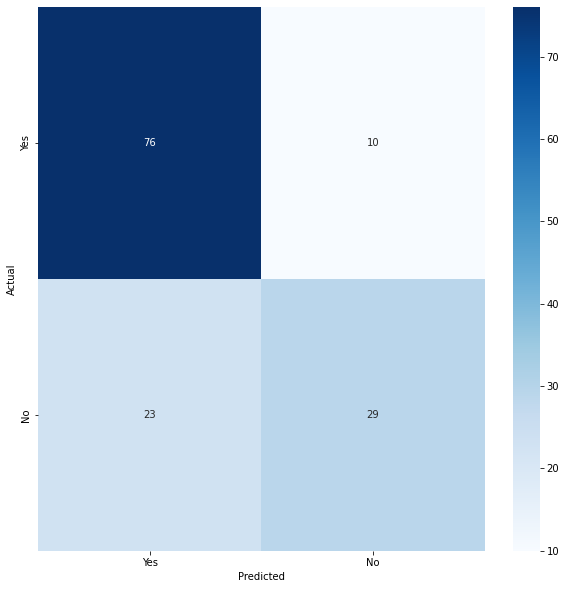

In [6]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))


# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(cm,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


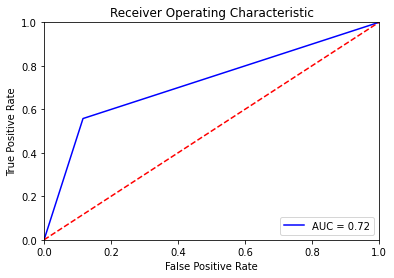

In [7]:
# Plot AUC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()